In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

Câu 1 Đọc dữ liệu

In [62]:
from google.colab import drive
drive.mount('/content/drive')

# Đường dẫn đến file
file_path = '/content/drive/My Drive/KTDL/titanic.csv'

# Đọc file CSV
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Câu 2 Tiền xử lý dữ liệu

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [64]:
df.head(12)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [26]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


2.1 Tạo thuộc tính deck từ cabin

In [65]:
import re
deck={"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
for dataset in [df]:
    dataset['cabin']=dataset['cabin'].fillna("U0")
    dataset['deck']=dataset['cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['deck']=dataset['deck'].map(deck)
    dataset['deck']=dataset['deck'].fillna(0)
    dataset['deck']=dataset['deck'].astype(int)
df=df.drop(['cabin'], axis=1)

In [29]:
df['ticket'].describe()

,ticket
count,1309
unique,929
top,CA. 2343
freq,11


2.2 Xóa thuộc tính cabin, ticket, boat, body, home.dest

In [66]:
df=df.drop(['ticket'],axis=1)
df=df.drop(['boat'],axis=1)
df=df.drop(['body'],axis=1)
df=df.drop(['home.dest'],axis=1)

2.3 Điền giá trị thiếu cho age, embarked

In [67]:
for dataset in [df]:
    mean = df["age"].mean()
    std=df["age"].std()
    is_null= dataset["age"].isnull().sum()
    rand_age = np.random.randint(mean-std,mean+std,size=is_null)
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)]=rand_age
    dataset["age"]=age_slice
    dataset["age"]=df["age"].astype(int)
df["age"].isnull().sum()

0

In [68]:
df['embarked'].describe()

,embarked
count,1307
unique,3
top,S
freq,914


In [69]:
common_value = 'S'
for dataset in [df]:
    dataset['embarked']=dataset['embarked'].fillna(common_value)

2.4 Điền giá trị thiếu cho fare, chuyển về số

In [70]:
for dataset in [df]:
    dataset['fare']= dataset['fare'].fillna(0)
    dataset['fare']= dataset['fare'].astype(int)

In [71]:
for dataset in [df]:
    dataset.loc[dataset['fare'] <= 7.91, 'fare' ]= 0
    dataset.loc[(dataset['fare'] > 7.91) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31), 'fare'] = 2
    dataset.loc[(dataset['fare'] > 31) & (dataset['fare'] <= 99), 'fare'] = 3
    dataset.loc[(dataset['fare'] > 99) & (dataset['fare'] <= 250), 'fare'] = 4
    dataset.loc[dataset['fare'] > 250, 'fare'] = 5
    dataset['fare']=dataset['fare'].astype(int)

2.5 Xóa thuộc tính name

In [72]:
df=df.drop(['name'],axis=1)

2.6 Chuyển thuộc tính sex

In [73]:
genders={"male": 0, "female":1}

for dataset in [df]:
    dataset['sex']=dataset['sex'].map(genders)

2.7 Chuyển thuộc tính embarked

In [74]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in [df]:
    dataset['embarked']=dataset['embarked'].map(ports)

2.8 Chuẩn hóa thuộc tính age

In [75]:
for dataset in [df]:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[dataset['age'] <= 11, 'age' ]= 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 49), 'age'] = 5
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[dataset['age'] > 66, 'age' ] = 7

In [76]:
df[:5]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,deck
0,1,1,1,4,0,0,4,0,2
1,1,1,0,0,1,2,4,0,3
2,1,0,1,0,1,2,4,0,3
3,1,0,0,4,1,2,4,0,3
4,1,0,1,3,1,2,4,0,3


Gom cụm

Câu 3. Tách survived, gom cụm kmeans cho df

In [77]:
true_label = df.survived
true_label
df.drop(columns=['survived'], inplace=True)
df

,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,1,1,4,0,0,4,0,2
1,1,0,0,1,2,4,0,3
2,1,1,0,1,2,4,0,3
3,1,0,4,1,2,4,0,3
4,1,1,3,1,2,4,0,3
...,...,...,...,...,...,...,...,...
1304,3,1,1,1,0,1,1,8
1305,3,1,5,1,0,1,1,8
1306,3,0,3,0,0,0,1,8
1307,3,0,3,0,0,0,1,8


In [78]:
from sklearn.cluster import KMeans
algorithm = KMeans(n_clusters=2, init='random')
algorithm.fit(df)
predict_label = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [79]:
true_label = true_label.values

Câu 4. Confusion matrix, Classification Reports

Text(95.72222222222221, 0.5, 'True Labels')

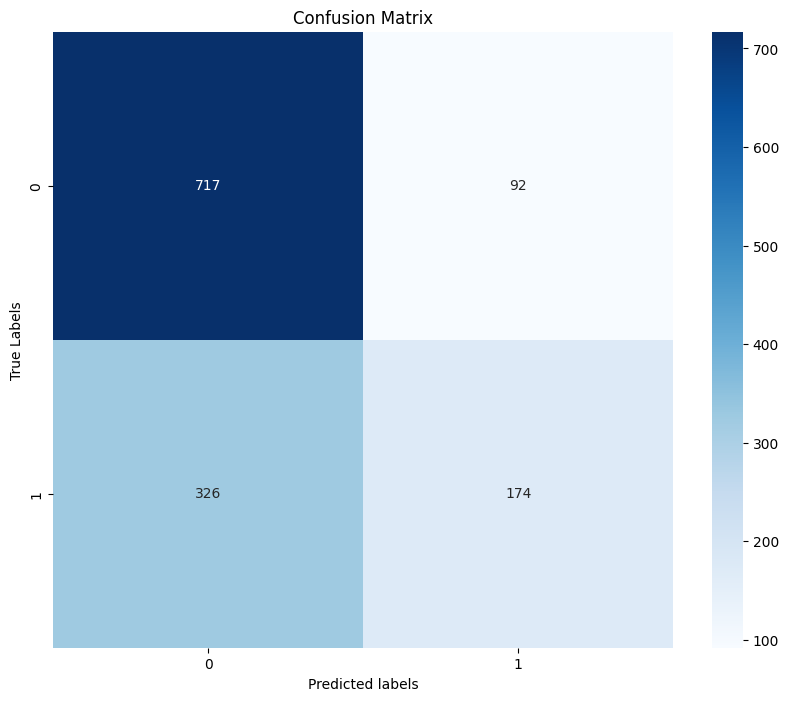

In [80]:
from sklearn. metrics import confusion_matrix

conf_matrix = confusion_matrix(true_label, predict_label)

plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(2))
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")

In [81]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(true_label,predict_label))

              precision    recall  f1-score   support

           0       0.69      0.89      0.77       809
           1       0.65      0.35      0.45       500

    accuracy                           0.68      1309
   macro avg       0.67      0.62      0.61      1309
weighted avg       0.67      0.68      0.65      1309



Đảo thứ tự cụm

In [82]:
new_predict_label = np.where(predict_label==0,1,0)

Text(95.72222222222221, 0.5, 'True Labels')

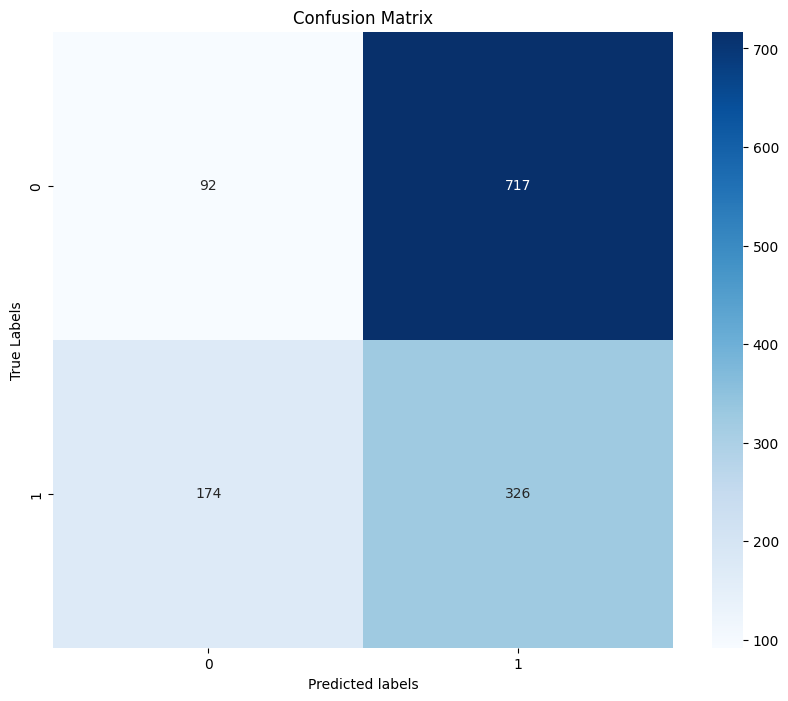

In [83]:
from sklearn. metrics import confusion_matrix

conf_matrix = confusion_matrix(true_label, new_predict_label)

plt.figure(figsize = (10,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(2), yticklabels=range(2))
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True Labels")

In [84]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(true_label,new_predict_label))

              precision    recall  f1-score   support

           0       0.35      0.11      0.17       809
           1       0.31      0.65      0.42       500

    accuracy                           0.32      1309
   macro avg       0.33      0.38      0.30      1309
weighted avg       0.33      0.32      0.27      1309



Câu 5. Tính entropy và purity

In [86]:
predict_label = predict_label
def purity(true_label, predict_label):
  cm=confusion_matrix(true_label, predict_label)
  purity_score = np.sum(np.sum(np.max(cm,axis=0))/np.sum(cm))
  return purity_score

purity_score = purity(true_label, predict_label)
print(f'Purity:{purity_score:.4f}')

Purity:0.6807


In [87]:
from sklearn.metrics import confusion_matrix

def entropy(true_label, new_predict_label):
    cm = confusion_matrix(true_label, predict_label)
    n_samples = np.sum(cm)
    entropy_score = 0
    for cluster in cm:
        cluster_total = np.sum(cluster)
        if cluster_total == 0:
            continue
        cluster_entropy = 0
        for i in cluster:
            if i > 0:
                probability = i / cluster_total
                cluster_entropy -= probability * np.log2(probability)
        entropy_score += (cluster_total / n_samples) * cluster_entropy
    return entropy_score

entropy_score = entropy(true_label, predict_label)
print("Entropy:", entropy_score)

Entropy: 0.6719357971377955


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
%cd '/content/drive/My Drive/KTDL'

/content/drive/My Drive/KTDL


In [90]:
!jupyter nbconvert --to html 22521034_BTTuan5_Cau4.ipynb

[NbConvertApp] Converting notebook 22521034_BTTuan5_Cau4.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 426648 bytes to 22521034_BTTuan5_Cau4.html
